In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values

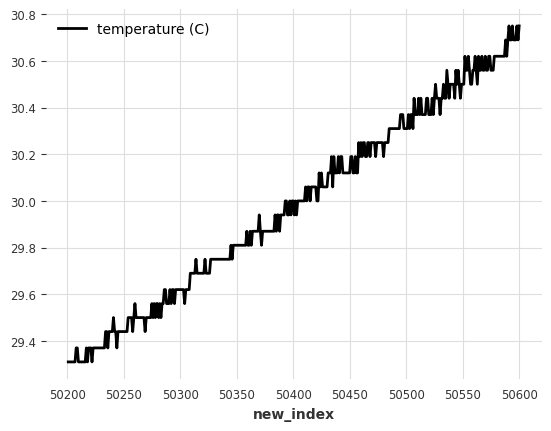

In [2]:
filtered_ph_temp_df = pd.read_csv('new feeds temp rising values.csv', usecols = ['new_index','temp','ph']) # Change csv file

series_temp = TimeSeries.from_dataframe(filtered_ph_temp_df, "new_index", "temp")
series_temp = fill_missing_values(series_temp, fill='auto')

series_temp.plot(label = 'temperature (C)')
plt.legend();

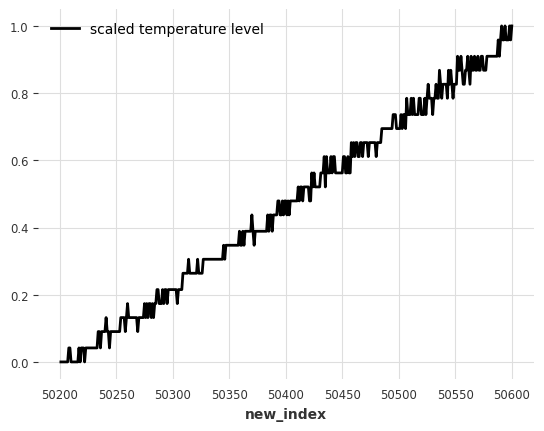

In [3]:
from darts.dataprocessing.transformers import Scaler
scaler_temp = Scaler()
series_temp_scaled = scaler_temp.fit_transform(series_temp);

series_temp_scaled.plot(label = 'scaled temperature level')
plt.legend();

In [4]:
from darts.models import NBEATSModel, RNNModel
from darts.metrics import mape, rmse, mase
from darts.utils.model_selection import train_test_split

train_temp, test_temp = train_test_split(series_temp_scaled, test_size=0.20)
NBEATS_temp = NBEATSModel(input_chunk_length=round(len(test_temp)*0.67), output_chunk_length=round(len(test_temp)*0.33), random_state = 0)
LSTM_temp = RNNModel(model="LSTM", training_length=len(test_temp), input_chunk_length=round(len(test_temp)*0.67), random_state = 0, n_rnn_layers = 12)
GRU_temp = RNNModel(model="GRU", training_length=len(test_temp), input_chunk_length=round(len(test_temp)*0.67), random_state = 0, n_rnn_layers = 12)
RNN_temp = RNNModel(model="RNN", training_length=len(test_temp), input_chunk_length=round(len(test_temp)*0.67), random_state = 0, n_rnn_layers = 12)

c:\Programming\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
25.741    Total estimated model params size (MB)


Epoch 99: 100%|██████████| 8/8 [00:00<00:00,  9.68it/s, train_loss=0.000656]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 8/8 [00:00<00:00,  9.67it/s, train_loss=0.000656]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 60.0 K
4 | V             | Linear           | 26    
---------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s, train_loss=0.00127] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s, train_loss=0.00127]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 45.0 K
4 | V             | Linear           | 26    
---------------------------------------------------
45.0 K    Trainable params
0         Non-trainable params
45.0 K    Total params
0.180     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s, train_loss=0.000506]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s, train_loss=0.000506]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 15.0 K
4 | V             | Linear           | 26    
---------------------------------------------------
15.0 K    Trainable params
0         Non-trainable params
15.0 K    Total params
0.060     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 8/8 [00:00<00:00, 12.52it/s, train_loss=0.00053] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 8/8 [00:00<00:00, 12.50it/s, train_loss=0.00053]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 31.16it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 14.99it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 23.69it/s]


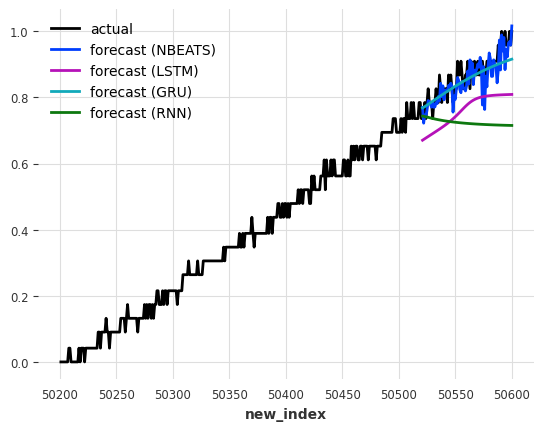

In [5]:
NBEATS_temp.fit(train_temp, verbose=True)
LSTM_temp.fit(train_temp, verbose=True)
GRU_temp.fit(train_temp, verbose=True)
RNN_temp.fit(train_temp, verbose=True)

NBEATSpred_temp = NBEATS_temp.predict(n=len(test_temp), series=train_temp)
LSTMpred_temp = LSTM_temp.predict(n=len(test_temp), series=train_temp)
GRUpred_temp = GRU_temp.predict(n=len(test_temp), series=train_temp)
RNNpred_temp = RNN_temp.predict(n=len(test_temp), series=train_temp)

series_temp_scaled.plot(label='actual')
NBEATSpred_temp.plot(label='forecast (NBEATS)')
LSTMpred_temp.plot(label='forecast (LSTM)')
GRUpred_temp.plot(label='forecast (GRU)')
RNNpred_temp.plot(label='forecast (RNN)')
plt.legend();

In [6]:
print('MASE (NBEATS) = {:.3f}'.format(mase(test_temp, NBEATSpred_temp, train_temp)))
print('RMSE (NBEATS) = {:.5f}'.format(rmse(test_temp, NBEATSpred_temp)))

print('MASE (LSTM) = {:.3f}'.format(mase(test_temp, LSTMpred_temp, train_temp)))
print('RMSE (LSTM) = {:.5f}'.format(rmse(test_temp, LSTMpred_temp)))

print('MASE (GRU) = {:.3f}'.format(mase(test_temp, GRUpred_temp, train_temp)))
print('RMSE (GRU) = {:.5f}'.format(rmse(test_temp, GRUpred_temp)))

print('MASE (RNN) = {:.3f}'.format(mase(test_temp, RNNpred_temp, train_temp)))
print('RMSE (RNN) = {:.5f}'.format(rmse(test_temp, RNNpred_temp)))

MASE (NBEATS) = 1.766
RMSE (NBEATS) = 0.04129
MASE (LSTM) = 6.145
RMSE (LSTM) = 0.11215
MASE (GRU) = 1.617
RMSE (GRU) = 0.03609
MASE (RNN) = 8.249
RMSE (RNN) = 0.16001
